In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

# Suppress FutureWarning messages
with warnings.catch_warnings():
    warnings.simplefilter("ignore")



In [5]:
#Look at the Dataframe
data = pd.read_excel("/Users/jordankavishe/Desktop/bprDATA/new_semi_conductor/data/WSTS-Historical-Billings-Report-Aug2023.xlsx", sheet_name="explore_sheet")

In [6]:
#Regions besides worldwide
regions = ["Americas", "Europe", "Japan", "Asia Pacific", "Worldwide"]

In [7]:
#How to get all the years from the original dataframe with corresponding rows
get_years = data["Unnamed: 0"]

get_years = get_years.to_frame()
get_years = get_years[~get_years["Unnamed: 0"].isin(regions)]
get_years.rename(columns={"Unnamed: 0" : "Year"}, inplace=True)
year = get_years["Year"]
empty = []
for y in year:
    empty.append(y)

In [8]:
#Function that makes a new dataframe from a desired region in the original dataframe and adds the years
def region_dataframe(region : str):
    region_df = data[data["Unnamed: 0"] == region]
    region_df.loc[:, "Year"] = empty
    cols = ['Year'] + [col for col in region_df if col != 'Year']
    region_df = region_df[cols]
    region_df.rename(columns={"Unnamed: 0" : "Region", "Total Year" : "Total Year (Region)"}, inplace=True)
    region_df.reset_index(drop=True, inplace=True)

    #region_df.set_index("Year", inplace=True)
    return region_df
    

In [9]:
#Creating dataframes by region
america = region_dataframe("Americas")
europe = region_dataframe("Europe")
japan = region_dataframe("Japan")
asia_pacific = region_dataframe("Asia Pacific")
worldwide = region_dataframe("Worldwide")

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/1716271200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df.loc[:, "Year"] = empty
/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/1716271200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_df.loc[:, "Year"] = empty
/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/1716271200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [10]:
#Adding the worldwide totals as a column by year to each regions dataframe

world_wide_totals = []

for i in worldwide["Total Year (Region)"]:
    world_wide_totals.append(i)

america["Total Year (Worldwide)"] = world_wide_totals
japan["Total Year (Worldwide)"] = world_wide_totals
europe["Total Year (Worldwide)"] = world_wide_totals
asia_pacific["Total Year (Worldwide)"] = world_wide_totals

In [11]:
#Getting the proportions from the region to the worldwide total and adding it as a column for each region
america["Total Year Percentage"] = america["Total Year (Region)"] / america["Total Year (Worldwide)"]
japan["Total Year Percentage"] = japan["Total Year (Region)"] / japan["Total Year (Worldwide)"]
europe["Total Year Percentage"] = europe["Total Year (Region)"] / europe["Total Year (Worldwide)"]
asia_pacific["Total Year Percentage"] = asia_pacific["Total Year (Region)"] / asia_pacific["Total Year (Worldwide)"]

# Bargraphs for Total Trading Year by Region (every 5 years)

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/2928593515.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


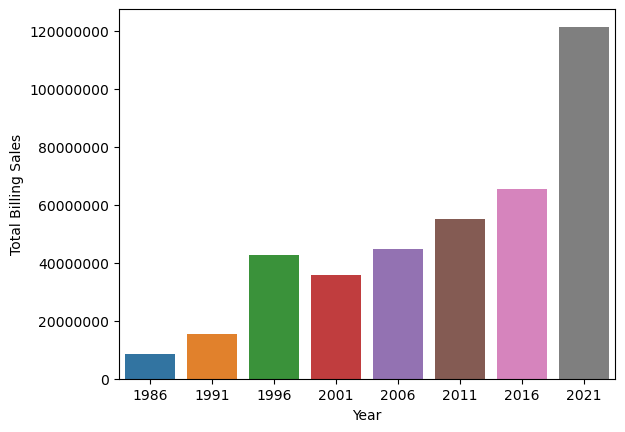

In [61]:
#Barplot visualization for Americas 
sns.barplot(data=america[::5], x="Year", y="Total Year (Region)")
y_labels = [int(float(label.get_text())*1e8) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(y_labels)

# Add a label to clarify the unit
plt.ylabel('Total Billing Sales')
plt.show()

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/3931879151.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


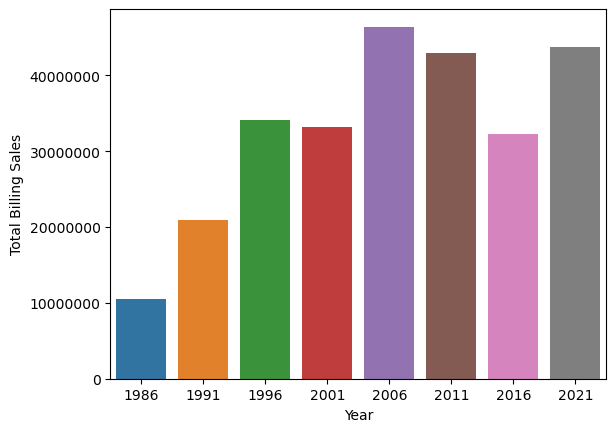

In [62]:
sns.barplot(data=japan[::5], x="Year", y="Total Year (Region)")
y_labels = [int(float(label.get_text())*1e7) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(y_labels)

# Add a label to clarify the unit
plt.ylabel('Total Billing Sales')
plt.show()

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/3632723044.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


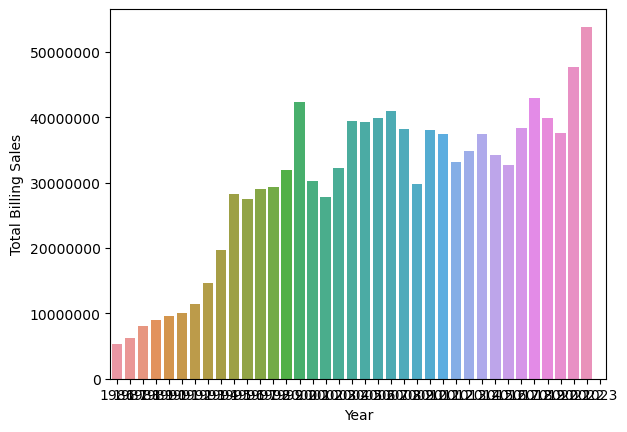

In [63]:
#Barplot visualization for Europe

sns.barplot(data=europe, x="Year", y="Total Year (Region)")
y_labels = [int(float(label.get_text())*1e7) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(y_labels)

# Add a label to clarify the unit
plt.ylabel('Total Billing Sales')

plt.show()

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/428439806.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


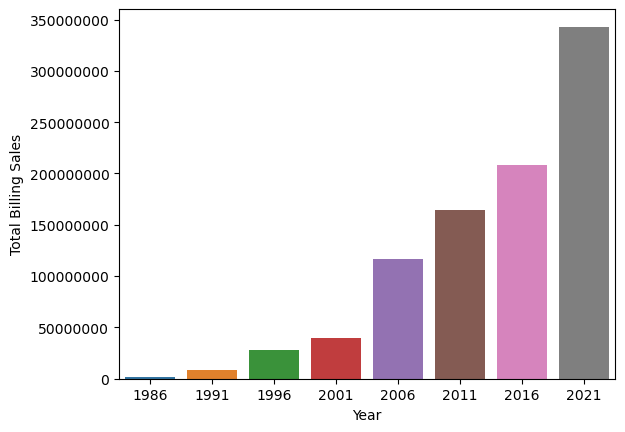

In [64]:
#Barplot visualization for Asia Pacific

sns.barplot(data=asia_pacific[::5], x="Year", y="Total Year (Region)")
y_labels = [int(float(label.get_text().replace('−', '-'))*1e8) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(y_labels)

# Add a label to clarify the unit
plt.ylabel('Total Billing Sales')
plt.show()

/var/folders/bv/cr3s5pnj5w55vhgmq67g6z1h0000gn/T/ipykernel_65556/4118501733.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_labels)


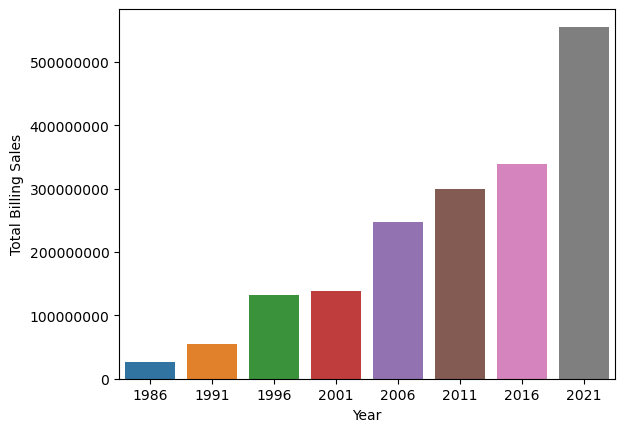

In [65]:
#Barplot visualization for Worldwide grand totals

sns.barplot(data=worldwide[::5], x="Year", y="Total Year (Region)")
y_labels = [int(float(label.get_text().replace('−', '-'))*1e8) for label in plt.gca().get_yticklabels()]
plt.gca().set_yticklabels(y_labels)

# Add a label to clarify the unit
plt.ylabel('Total Billing Sales')
plt.show()

# Bargraphs for Total Year by Region by Proportion of Worldwide Totals Each Year

<Axes: xlabel='Year', ylabel='Total Year Percentage'>

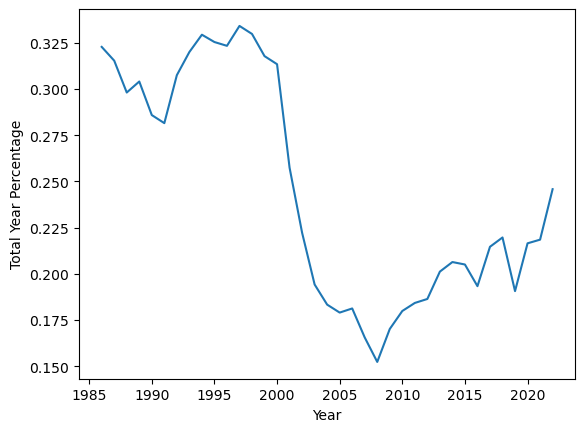

In [66]:
#Barplot visualization for Americas 

sns.lineplot(data=america, x="Year", y="Total Year Percentage", )

<Axes: xlabel='Year', ylabel='Total Year Percentage'>

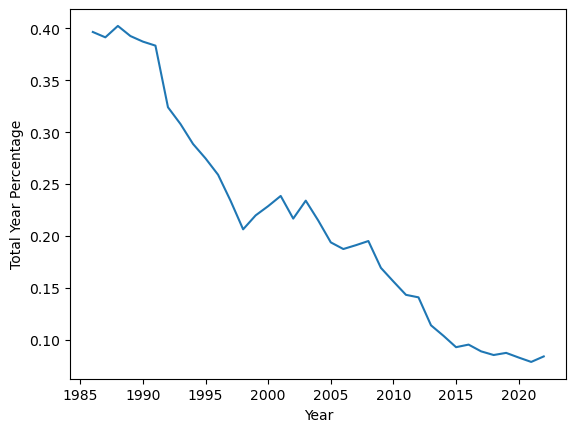

In [67]:
#Barplot visualization for japan

sns.lineplot(data=japan, x="Year", y="Total Year Percentage")

<Axes: xlabel='Year', ylabel='Total Year Percentage'>

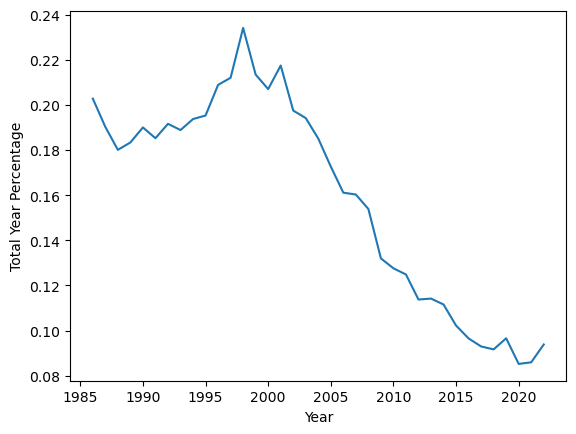

In [68]:
#Barplot visualization for Europe

sns.lineplot(data=europe, x="Year", y="Total Year Percentage")

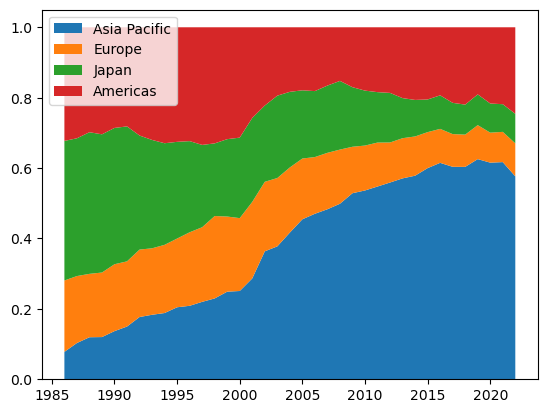

In [38]:
y_america = america["Total Year Percentage"]
y_europe = europe["Total Year Percentage"]
y_asia_pacific = asia_pacific["Total Year Percentage"]
y_japan = japan['Total Year Percentage']

plt.stackplot(empty, y_asia_pacific, y_europe, y_japan, y_america, labels=[ "Asia Pacific", "Europe", "Japan", "Americas"])
plt.legend(loc='upper left')

